# Navigation World MDP

The environment is inspired by Navigation Experiment in RHIRL (MacGlashan & Littman, 2015, p. 3695). Additional features were added to support further experimentation.

In [1]:
# Other Imports.
from simple_rl.tasks import NavigationWorldMDP
from simple_rl.agents import QLearningAgent
from simple_rl.planning import ValueIteration
from simple_rl.tasks.grid_world.GridWorldStateClass import GridWorldState
from simple_rl.tasks.navigation.NavigationStateClass import NavigationWorldState
from simple_rl.tasks.navigation.NavigationWorldMDP import *

# Python Imports.
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

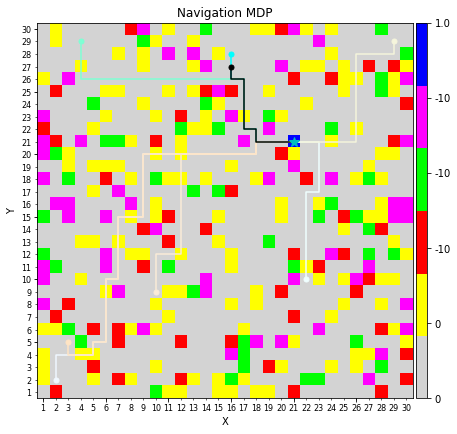

(<Figure size 504x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x124c0f1d0>)

In [2]:
np.random.seed(0)
nvmdp = NavigationWorldMDP(width=30, height=30, 
                      nav_cell_types=['lightgray', 'yellow', 'red', 'lime', 'magenta'],
                      nav_cell_rewards=[0, 0, -10, -10, -10],
                      nav_cell_p_or_locs=[0.68, 0.17, 0.05, 0.05, 0.05],
                      goal_cell_locs=[[(21,21)]],
                      goal_cell_rewards=[1.],
                      goal_cell_types=["blue"],
                      slip_prob=0.00, step_cost=0.0, gamma=.99)
traj_states_list, traj_action_list = nvmdp.sample_trajectories(n_traj=8, horizon=100, 
                                                               init_states=[NavigationWorldState(2,2)],
                                                               init_cell_types=["lightgray"], init_unique=True,
                                                               rand_init_to_match_n_traj=True)
nvmdp.visualize_grid(trajectories=traj_states_list, show_colorbar=True, show_rewards_colorbar=True, goal_marker="*c")

In [3]:
print("Cells: {}\nGoals: {}".format(nvmdp.combined_cell_types, nvmdp.goal_cell_types))

Cells: ['lightgray', 'yellow', 'red', 'lime', 'magenta', 'blue']
Goals: ['blue']


## Features used for short horizon

In [4]:
print("Feature format: \n<one-hot:{}>, <distance: {}>, <distance:{}>\n".format(
                                ", ".join(nvmdp.combined_cell_types), 
                                ", ".join(nvmdp.combined_cell_types), 
                                ", ".join(nvmdp.goal_cell_types)))

Feature format: 
<one-hot:lightgray, yellow, red, lime, magenta, blue>, <distance: lightgray, yellow, red, lime, magenta, blue>, <distance:blue>



In [5]:
sample_states = [(1,1), (1,2), (2,1), (1,8), (21,21)]
list(map(lambda s: nvmdp.feature_at_state(NavigationWorldState(s[0],s[1]),
                        feature_type="indicator",
                        incl_cell_distances=True,
                        incl_goal_indicator=False,
                        incl_goal_distances=True,
                        normalize_distance=False, dtype=np.float).tolist(), sample_states))

[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 7.0, 7.0, 40.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 6.0, 6.0, 39.0],
 [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 2.0, 0.0, 6.0, 8.0, 39.0],
 [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 2.0, 4.0, 0.0, 33.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 4.0, 2.0, 0.0]]

## Features used for long horizon

In [6]:
sample_states = [(1,1), (1,2), (2,1), (1,8), (21,21)]
list(map(lambda s: nvmdp.feature_at_state(NavigationWorldState(s[0],s[1]),
                        feature_type="indicator",
                        incl_cell_distances=False,
                        incl_goal_indicator=False,
                        incl_goal_distances=True,
                        normalize_distance=False, dtype=np.float).tolist(), sample_states))

[[1.0, 0.0, 0.0, 0.0, 0.0, 40.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 39.0],
 [0.0, 0.0, 1.0, 0.0, 0.0, 39.0],
 [0.0, 0.0, 0.0, 0.0, 1.0, 33.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

## Multiple Goals

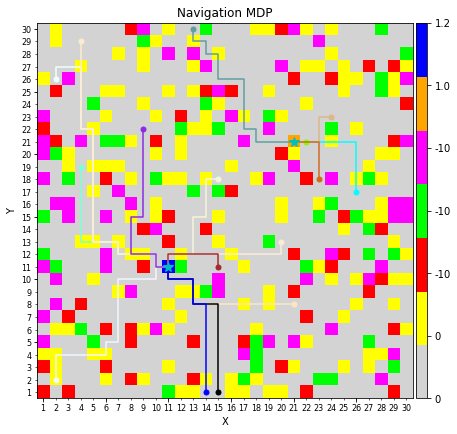

Sample State Trajectory


[[0.0, 1.0, 0.0, 0.0, 0.0, 38.0, 18.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 37.0, 17.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 36.0, 16.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 35.0, 15.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 34.0, 14.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 33.0, 13.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 32.0, 12.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 31.0, 11.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 30.0, 10.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 29.0, 9.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 28.0, 8.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 27.0, 7.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 26.0, 6.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 25.0, 5.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 24.0, 4.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 23.0, 3.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 22.0, 2.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 21.0, 1.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 0.0]]

In [7]:
np.random.seed(0)
nvmdp = NavigationWorldMDP(width=30, height=30, 
                      nav_cell_types=['lightgray', 'yellow', 'red', 'lime', 'magenta'],
                      nav_cell_rewards=[0, 0, -10, -10, -10],
                      nav_cell_p_or_locs=[0.68, 0.17, 0.05, 0.05, 0.05],
                      goal_cell_locs=[[(21,21)], [(11,11)]],
                      goal_cell_rewards=[1., 1.2],
                      goal_cell_types=["orange","blue"],
                      slip_prob=0.00, step_cost=0.0, gamma=.95)
traj_states_list, traj_action_list = nvmdp.sample_trajectories(n_traj=16, horizon=100, 
                                                               init_states=[NavigationWorldState(2,2)],
                                                               init_cell_types=["lightgray"], init_unique=True,
                                                               rand_init_to_match_n_traj=True)
nvmdp.visualize_grid(trajectories=traj_states_list, show_colorbar=True, show_rewards_colorbar=True, goal_marker="*c")
## Features: <Cell Type Ind, Goal Distances>
print("Sample State Trajectory")
[nvmdp.feature_at_state(s,
                        feature_type="indicator",
                        incl_cell_distances=False,
                        incl_goal_indicator=False,
                        incl_goal_distances=True,
                        normalize_distance=False, dtype=np.float).tolist() for s in traj_states_list[0]]

## Custom Grid

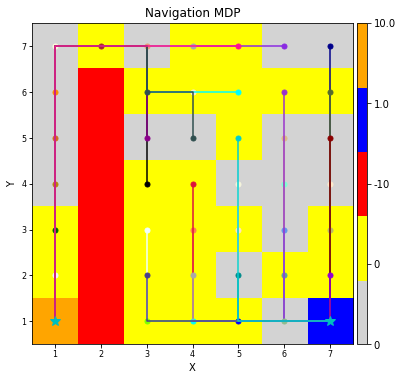

(<Figure size 432x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1274cfc88>)

In [8]:
nvmdp = NavigationWorldMDP(width=7, height=7,
                      nav_cell_types=['lightgray', 'yellow', 'red'],
                      nav_cell_rewards=[0, 0, -10],
                      nav_cell_p_or_locs=[0.5, 0.5, [(2,i) for i in range(1,7)]],
                      goal_cell_locs=[[(7,1)],[(1,1)]],
                      goal_cell_types=["blue", "orange"],
                      goal_cell_rewards=[1.,10.],
                      slip_prob=0.00, step_cost=0.0, gamma=.50)
traj_states_list, traj_action_list = nvmdp.sample_trajectories(n_traj=41, horizon=100, 
                                                               init_states=[NavigationWorldState(1,2)],
                                                               init_cell_types=["lightgray", "yellow"], init_unique=True,
                                                               rand_init_to_match_n_traj=True)
nvmdp.visualize_grid(trajectories=traj_states_list, show_colorbar=True, show_rewards_colorbar=True, goal_marker="*c")

## Updating Goals dynamically

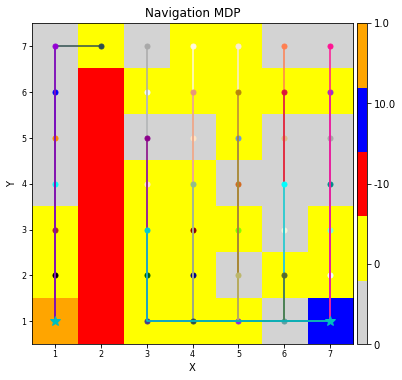

(<Figure size 432x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12759fcf8>)

In [9]:
nvmdp._reset_goals([[(7,1)],[(1,1)]],[10.,1.],["blue", "orange"])
traj_states_list, traj_action_list = nvmdp.sample_trajectories(n_traj=41, horizon=100, 
                                                               init_states=None,
                                                               init_cell_types=["lightgray", "yellow"], init_unique=True,
                                                               rand_init_to_match_n_traj=False)
nvmdp.visualize_grid(trajectories=traj_states_list, show_colorbar=True, show_rewards_colorbar=True, goal_marker="*c")

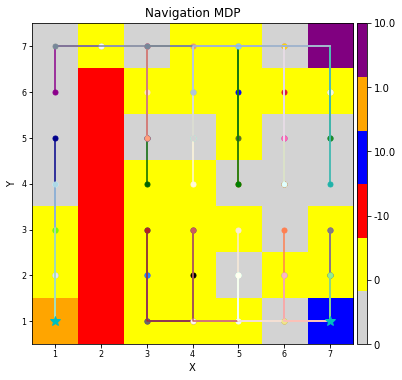

(<Figure size 432x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1279ee4a8>)

In [10]:
nvmdp._reset_goals([[(7,1)],[(1,1)],[(7,7)]],[10.,1.,10.],["blue", "orange","purple"])
traj_states_list, traj_action_list = nvmdp.sample_trajectories(n_traj=41, horizon=100, 
                                                               init_states=None,
                                                               init_cell_types=["lightgray", "yellow"], init_unique=True,
                                                               rand_init_to_match_n_traj=True)
nvmdp.visualize_grid(trajectories=traj_states_list, show_colorbar=True, show_rewards_colorbar=True, goal_marker="*c")

(<Figure size 1008x576 with 4 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x127cbbe80>)

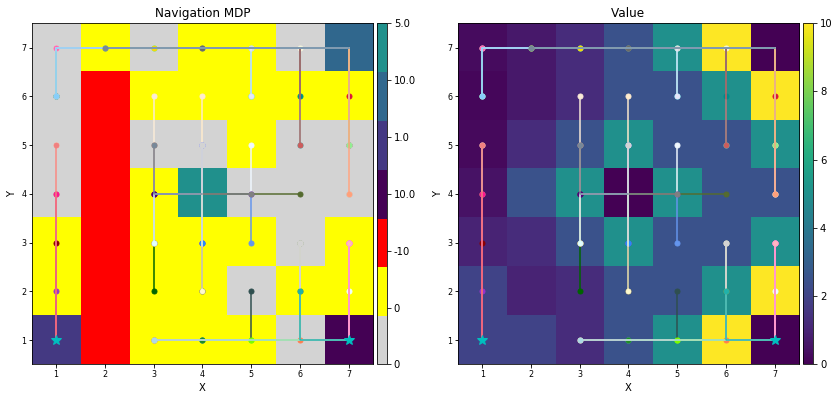

In [11]:
nvmdp._reset_goals([[(7,1)],[(1,1)],[(7,7)],[(4,4)]], [10.,1.,10.,5.],list(range(4)))
traj_states_list, traj_action_list = nvmdp.sample_trajectories(n_traj=41, horizon=100, 
                                                               init_states=None,
                                                               init_cell_types=["lightgray", "yellow"], init_unique=True,
                                                               rand_init_to_match_n_traj=True)
fig = plt.figure(figsize=(14,8))
nvmdp.visualize_grid(trajectories=traj_states_list, 
                          show_colorbar=True, show_rewards_colorbar=True, 
                          goal_marker="*c", fig=fig, subplot_str="121")
nvmdp.visualize_grid(nvmdp.get_value_grid(), trajectories=traj_states_list, 
                     show_colorbar=True, show_rewards_colorbar=False, 
                     goal_marker="*c", fig=fig, subplot_str="122",
                     state_space_cmap=False, title="Value")

## Updating Rewards dynamically

In [12]:
nvmdp.nav_cell_rewards, nvmdp.goal_cell_rewards

([0, 0, -10], [10.0, 1.0, 10.0, 5.0])

(<Figure size 1008x576 with 4 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x127eb2160>)

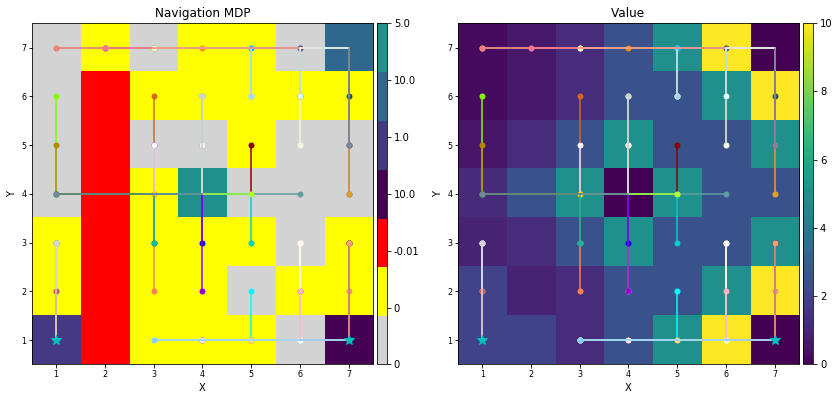

In [13]:
nvmdp._reset_rewards([0, 0, -0.01], [], [10., 1.0, 10., 5.])
traj_states_list, traj_action_list = nvmdp.sample_trajectories(n_traj=41, horizon=100, 
                                                               init_states=None,
                                                               init_cell_types=["lightgray", "yellow"], init_unique=True,
                                                               rand_init_to_match_n_traj=True)
fig = plt.figure(figsize=(14,8))
nvmdp.visualize_grid(trajectories=traj_states_list, show_colorbar=True, 
                     show_rewards_colorbar=True, goal_marker="*c", fig=fig, subplot_str="121")
nvmdp.visualize_grid(nvmdp.get_value_grid(), trajectories=traj_states_list, 
                     show_colorbar=True, show_rewards_colorbar=False, 
                     goal_marker="*c", fig=fig, subplot_str="122", 
                     state_space_cmap=False, title="Value")

## Adding custom obstacles

In [14]:
W, H = 30, 30
n_obstacles = 30
goal_tile = RectangularTile(21,21,1,1)
obstacle_cells = list(itertools.chain(*[o() for o in generate_obstacles(
                              W, H, n_obstacles, 
                              obstacle_w_mu=3, obstacle_w_std=3, 
                              obstacle_h_mu=3, obstacle_h_std=3,
                              buffer_w=2, buffer_h=1, max_search_tries=100, exclude_tiles=[goal_tile])]))

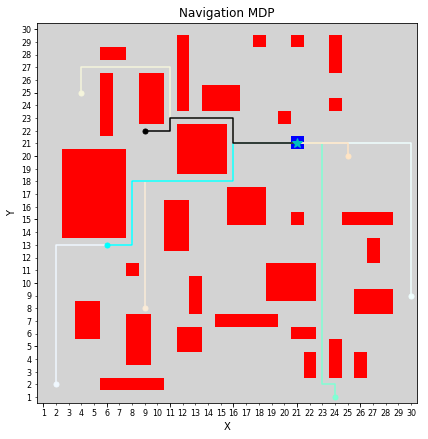

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1280cb518>)

In [15]:
reward_living = -0.01
reward_obtacle = -1.0

nvmdp = NavigationWorldMDP(width=W, height=H, 
                      nav_cell_types=['lightgray', 'red'],
                      nav_cell_rewards=[0, -10],
                      nav_cell_p_or_locs=[1., obstacle_cells],
                      goal_cell_locs=[[(goal_tile.x, goal_tile.y)]],
                      goal_cell_rewards=[1.],
                      goal_cell_types=["blue"],
                      slip_prob=0.00, step_cost=0.0, gamma=.99)
traj_states_list, traj_action_list = nvmdp.sample_trajectories(n_traj=8, horizon=100, 
                                                               init_states=[NavigationWorldState(2,2)],
                                                               init_cell_types=["lightgray"], init_unique=True,
                                                               rand_init_to_match_n_traj=True)
nvmdp.visualize_grid(trajectories=traj_states_list, show_colorbar=False, 
                     show_rewards_colorbar=True, goal_marker="*c")

## Reference

[1] MacGlashan, James, and Michael L. Littman. "Between Imitation and Intention Learning." IJCAI. 2015.